**นายปุณยเกียรติ ถนอมทรัพย์**
**64102010080**

# Categorical (nominal) variable transformation

In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
enc = preprocessing.OneHotEncoder()
X = pd.DataFrame([['male', 'from America', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']])
print(f'original value:\n {X}')
print(f'one hot mapped value:\n {enc.fit_transform(X).toarray()}')

original value:
         0             1             2
0    male  from America   uses Safari
1  female   from Europe  uses Firefox
one hot mapped value:
 [[0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]]


In [3]:
genders = ['female', 'male','undefined']
locations = ['from Africa', 'from Asia', 'from Europe', 'from America']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
#X = [['male', 'from America', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit([['male', 'from America', 'uses Safari']])
print(enc.transform([['male', 'from America', 'uses Safari']]).toarray())

[[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
ord = preprocessing.OrdinalEncoder()
X = pd.DataFrame([['male', 'from America', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']])
print(f'original value:\n {X}')
print(f'ordinal mapped value:\n {ord.fit_transform(X)}')

original value:
         0             1             2
0    male  from America   uses Safari
1  female   from Europe  uses Firefox
ordinal mapped value:
 [[1. 0. 1.]
 [0. 1. 0.]]


##Exercise 1
1. Create a dataset with three columns, 4 instances</br>
  1. BKK; F; flute</br>
  2. Hanoi; M; drum</br>
  3. SG; F; piano</br>
  4. BKK; F; flute</br>
then perform onehot encoding this dataset




first column: city name: three possible 4 cities, i.e., BKK, Hanoi, SG and KL</br>
Second column: Gender: 2 genders: M or F</br>
Third columns: Instruments: 3 instruments: piano, flute, drum</br>

2. Perform one hot encoding on this vector: [Hanoid, M, drum]

In [6]:
orces = pd.DataFrame(np.array([["BKK" , "F" ,"flute"],["Hanoi" , "M", "drum"],["SG","F","piano"],["BKK","F","flute"]]))
orces

,0,1,2
0,BKK,F,flute
1,Hanoi,M,drum
2,SG,F,piano
3,BKK,F,flute


# Categorical (Ordinal) variable transformation

In [7]:
degree=['low', 'medium', 'high']
temp = ['cool', 'fair', 'hot']
ord = preprocessing.OrdinalEncoder(categories=[degree, temp])
ord.fit_transform([['medium','hot'], ['high', 'cool']])

array([[1., 2.],
       [2., 0.]])

In [8]:
ord = preprocessing.OrdinalEncoder()
ord.fit_transform([['medium','hot'], ['high', 'cool']])

array([[1., 1.],
       [0., 0.]])

# Target encoding

In [9]:
#!pip install scikit-learn==1.3.1

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import TargetEncoder
#import sklearn.preprocessing
X = ["dog"] * 20 + ["cat"] * 30 + ["snake"] * 38
y = [90.3] * 5 + [80.1] * 15 + [20.4] * 5 + [20.1] * 25 + [21.2] * 8 + [49] * 30
df = pd.DataFrame({'X':X, 'y':y})
print(df)
enc_auto = TargetEncoder(smooth="auto")
X_trans = enc_auto.fit_transform(np.array(X).reshape(-1,1), df['y'])
print(X_trans.shape)

        X     y
0     dog  90.3
1     dog  90.3
2     dog  90.3
3     dog  90.3
4     dog  90.3
..    ...   ...
83  snake  49.0
84  snake  49.0
85  snake  49.0
86  snake  49.0
87  snake  49.0

[88 rows x 2 columns]
(88, 1)


In [11]:
print(X_trans)

[[82.19563256]
 [82.06427396]
 [82.06497231]
 [82.06497231]
 [82.06427396]
 [82.06427396]
 [83.02218591]
 [83.62203031]
 [82.06427396]
 [82.06497231]
 [83.62203031]
 [82.06427396]
 [83.62203031]
 [83.02218591]
 [83.62203031]
 [83.62203031]
 [82.06497231]
 [83.62203031]
 [82.06497231]
 [83.02218591]
 [20.13751675]
 [20.15457052]
 [20.14446132]
 [20.15457112]
 [20.13751675]
 [20.15457052]
 [20.15457052]
 [20.13751675]
 [20.15457112]
 [20.15457052]
 [20.14446132]
 [20.15457112]
 [20.15457112]
 [20.1600228 ]
 [20.15457112]
 [20.15457112]
 [20.15457112]
 [20.13751675]
 [20.15457112]
 [20.15457052]
 [20.14446132]
 [20.15457052]
 [20.15457052]
 [20.13751675]
 [20.15457052]
 [20.1600228 ]
 [20.1600228 ]
 [20.1600228 ]
 [20.13751675]
 [20.1600228 ]
 [44.1993842 ]
 [43.27133655]
 [42.51735576]
 [42.74171147]
 [43.27133655]
 [43.10474269]
 [44.1993842 ]
 [44.1993842 ]
 [43.27133655]
 [42.74171147]
 [42.51735576]
 [43.27133655]
 [43.10474269]
 [42.74171147]
 [44.1993842 ]
 [42.51735576]
 [43.27133

# Scaling

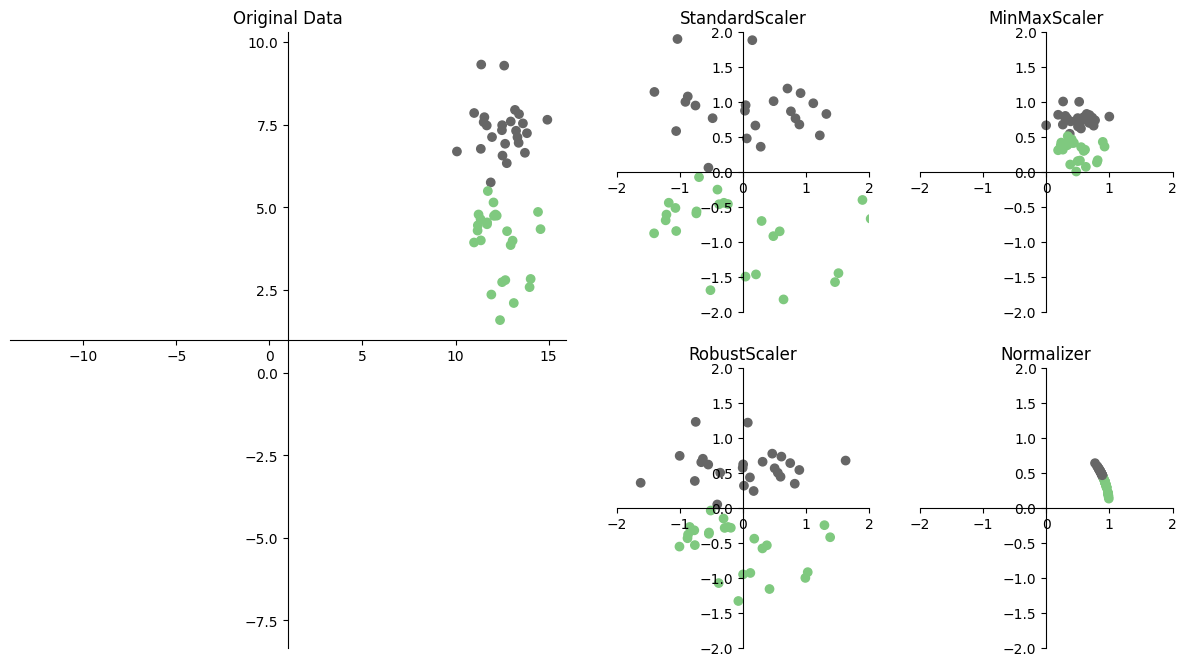

In [12]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# comparison between scaling and not scaling on ridge regression and KNN

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

<Figure size 640x480 with 0 Axes>

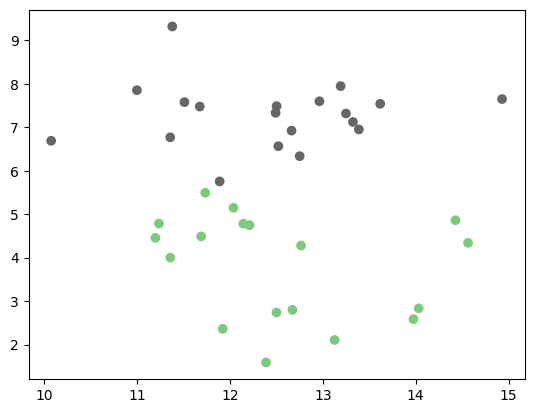

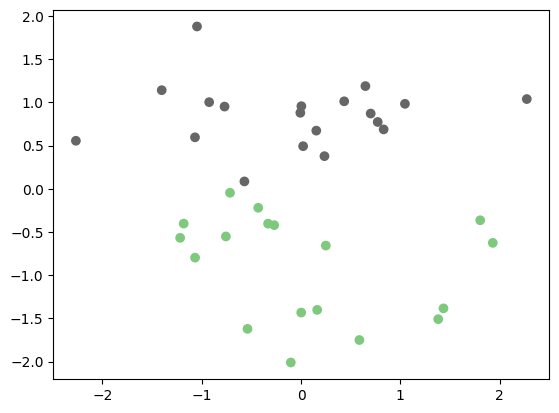

<Figure size 640x480 with 0 Axes>

In [21]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap="Accent")
plt.figure()
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=y_train, cmap="Accent")
plt.figure()


In [22]:
X_train_scaled

array([[ 7.71940616e-01,  7.74193254e-01],
       [ 5.87458518e-01, -1.75047195e+00],
       [ 2.08759506e-02,  4.93890300e-01],
       [ 1.55315613e-03, -1.43249353e+00],
       [ 8.31594451e-01,  6.88202786e-01],
       [ 6.47978963e-01,  1.18980827e+00],
       [ 2.35592721e-01,  3.78402574e-01],
       [ 2.49467231e-01, -6.56979591e-01],
       [-1.18153076e+00, -4.02576207e-01],
       [ 1.80400371e+00, -3.63828417e-01],
       [-7.56755041e-01, -5.51210406e-01],
       [-7.15303299e-01, -4.57439989e-02],
       [-2.70124101e-01, -4.20565046e-01],
       [-7.70239612e-01,  9.52634394e-01],
       [ 1.53483314e-01,  6.73940908e-01],
       [-1.04748190e+00,  1.88000697e+00],
       [ 3.23641987e-03,  9.57281580e-01],
       [-1.21725720e+00, -5.67579878e-01],
       [-1.06692015e+00, -7.96775475e-01],
       [-7.09929409e-03,  8.80435645e-01],
       [ 1.43424175e+00, -1.38411905e+00],
       [-5.70299349e-01,  8.59737579e-02],
       [-1.06789226e+00,  5.96575179e-01],
       [ 1.

In [23]:
#without scaling
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores_rid = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
from sklearn.neighbors import KNeighborsRegressor
scores_knn = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
print(f'KNN average result: {np.mean(scores_knn): .4f} and SD: {np.std(scores_knn): .4f}')
print(f'ridge reg average result: {np.mean(scores_rid): .4f} and SD: {np.std(scores_rid): .4f}\n')

KNN average result:  0.8580 and SD:  0.3052
ridge reg average result:  0.6620 and SD:  0.2314



In [24]:
#without scaling
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores_rid = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
from sklearn.neighbors import KNeighborsRegressor
scores_knn = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
print(f'KNN average result: {np.mean(scores_knn): .4f} and SD: {np.std(scores_knn): .4f}')
print(f'ridge reg average result: {np.mean(scores_rid): .4f} and SD: {np.std(scores_rid): .4f}\n')

KNN average result:  0.7373 and SD:  0.4162
ridge reg average result:  0.6559 and SD:  0.2316



#Discretization: Continous to discrete

Automatically created module for IPython interactive environment


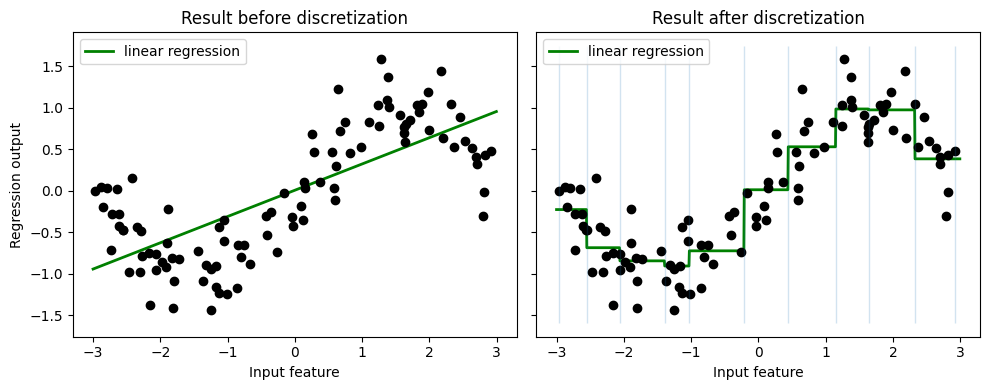

In [25]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
'''reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
'''
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)
'''ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
'''
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=531, parser='auto')
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

InvalidIndexError: ignored

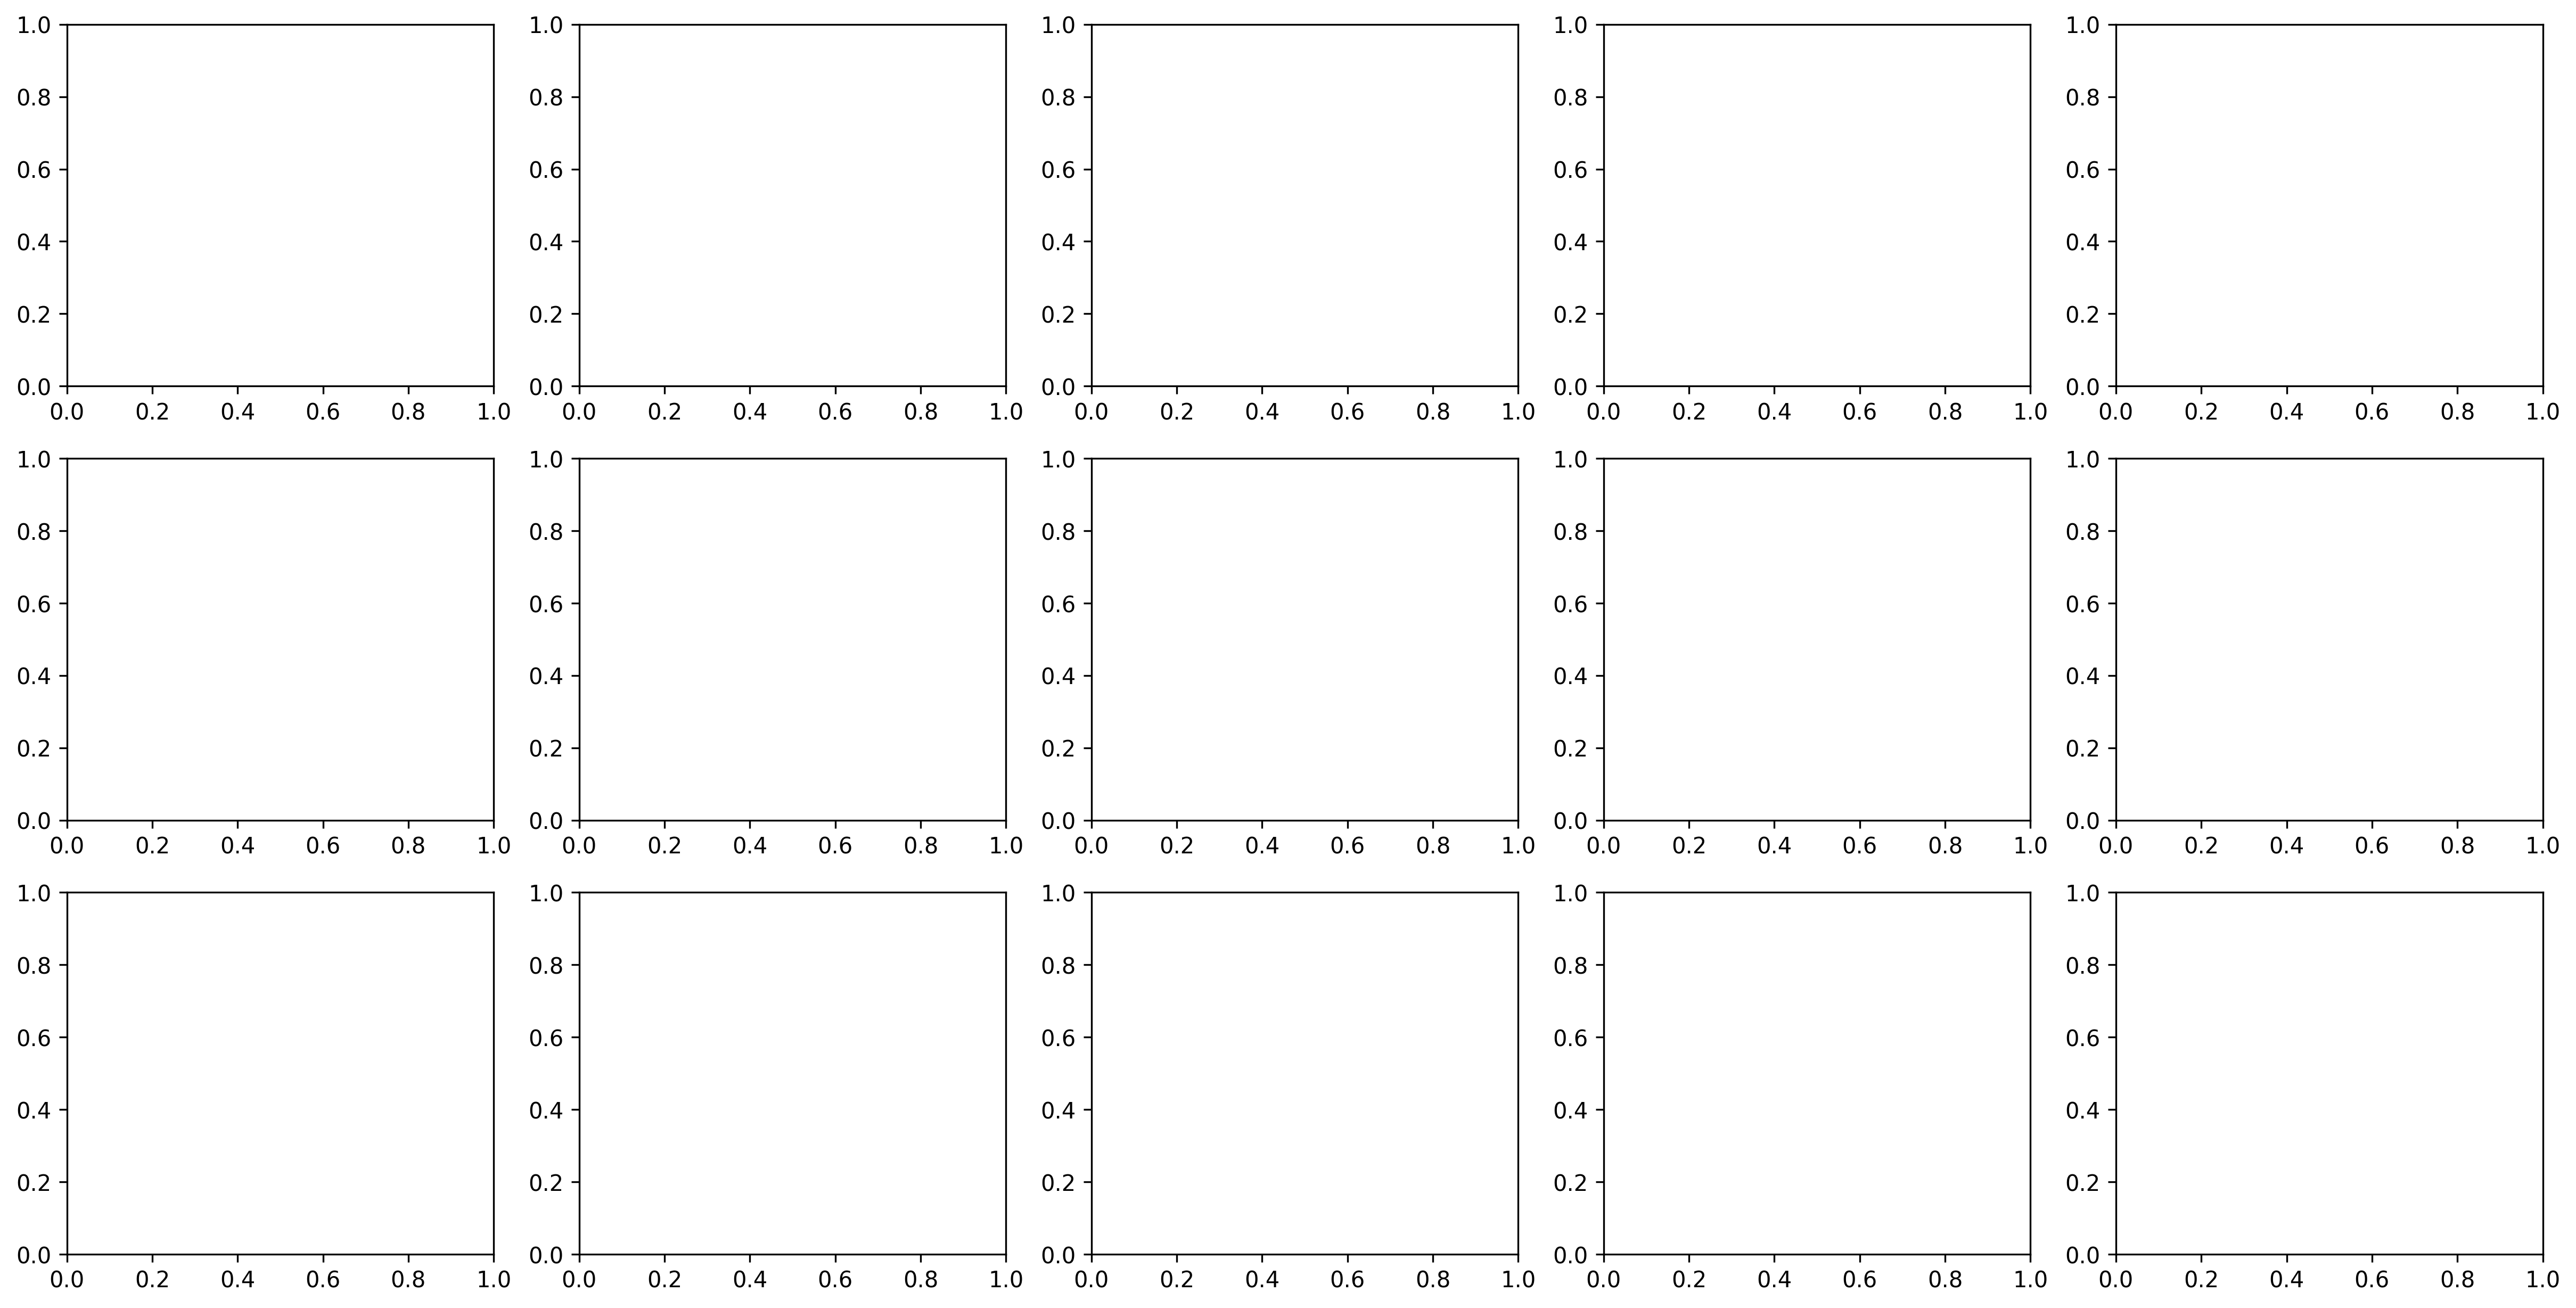

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

TypeError: ignored

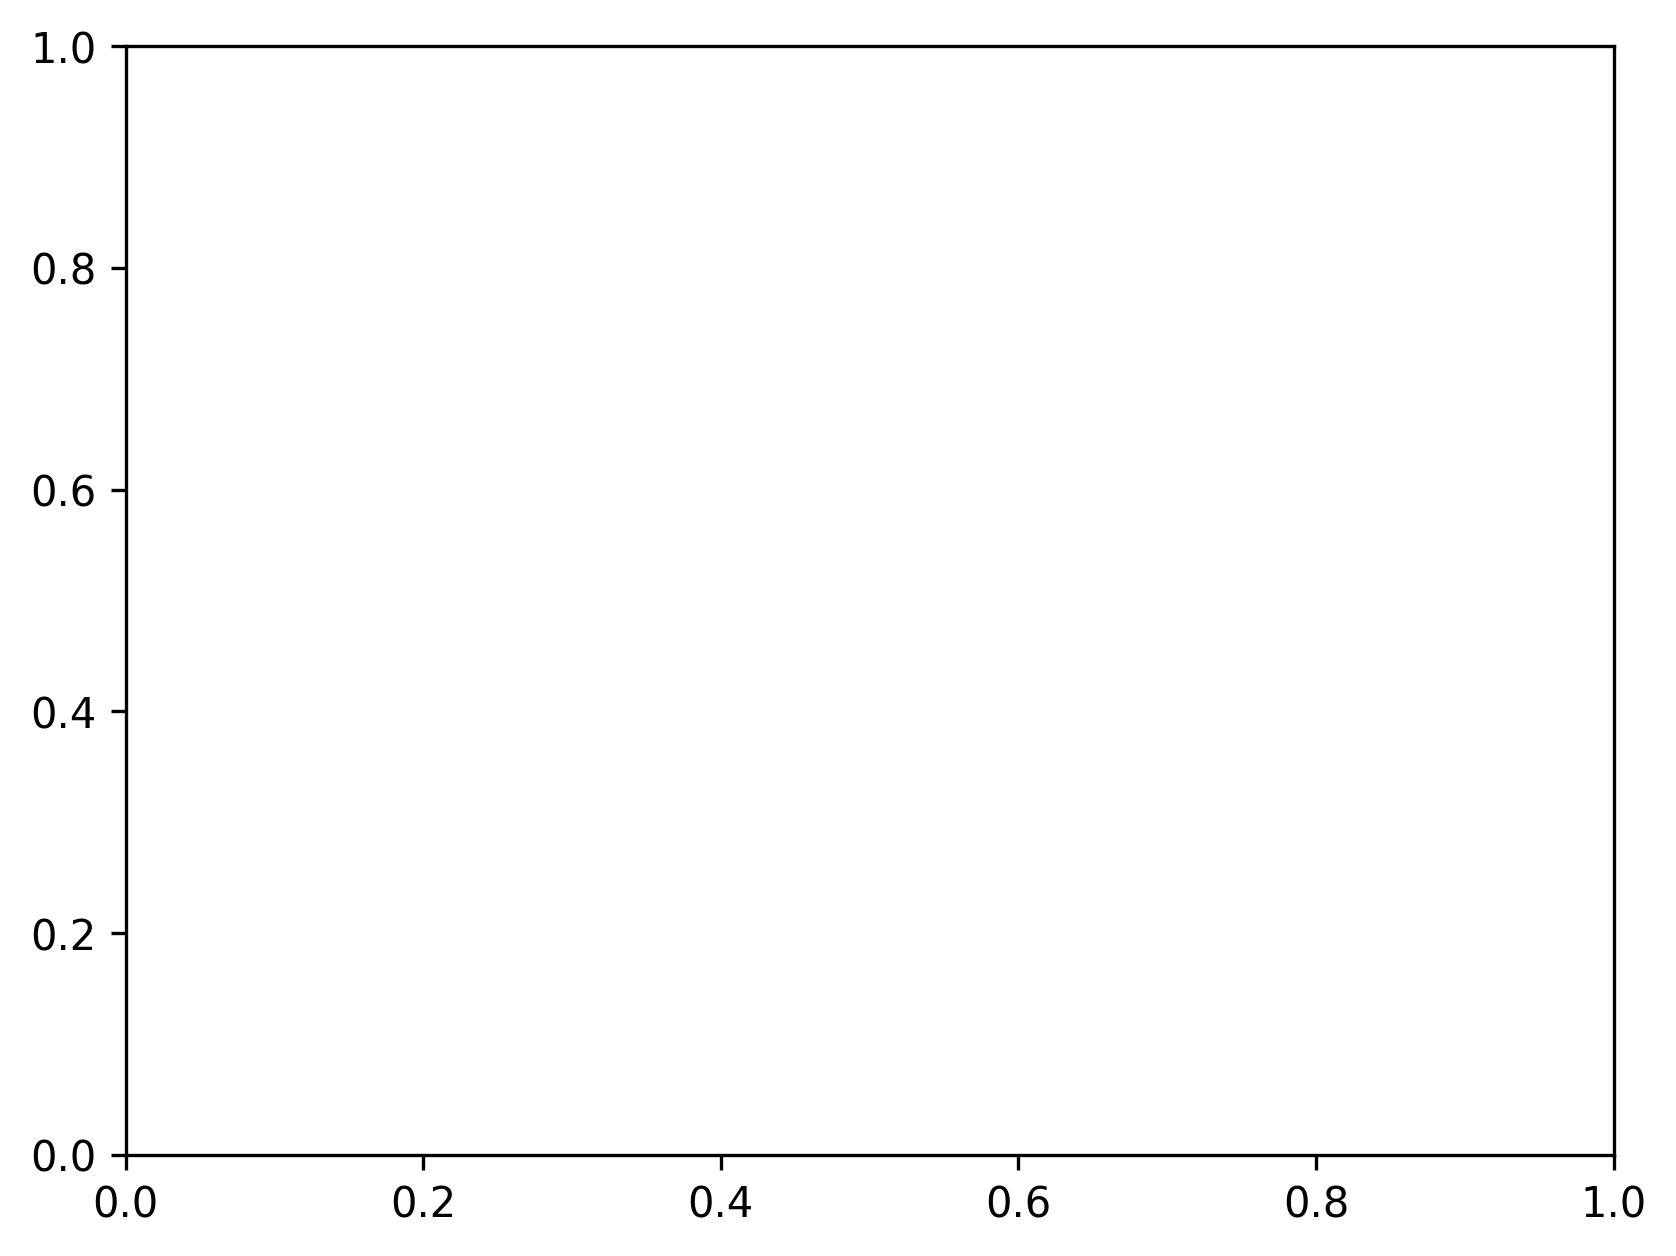

In [34]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("SCALE")

#Pipeline

In [35]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=531, parser='auto')
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
score  = ridge.score(X_test_scaled, y_test)
print(f'{score: .3f}')

 0.635


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import Ridge
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(f'{score: .3f}')

 0.635


In [37]:
from sklearn.pipeline import Pipeline
pipe_a = Pipeline((("scale", StandardScaler()),
                 ("rdg", Ridge())))
print(pipe_a)
print(pipe)

Pipeline(steps=(('scale', StandardScaler()), ('rdg', Ridge())))
Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])


In [38]:
#setting parameter
pipe.set_params(ridge__max_iter=300)
print(pipe)
pipe_a.set_params(rdg__max_iter=400)
print(pipe_a)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(max_iter=300))])
Pipeline(steps=(('scale', StandardScaler()), ('rdg', Ridge(max_iter=400))))


Using grid search to determine the best  coefficeint

In [39]:
#Using gridsearch to determine the best parameter

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 5}
0.606952770711171


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
b_cancer=load_breast_cancer()
X, y = b_cancer.data, b_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
log_reg_pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=400))
param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(log_reg_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'logisticregression__C': 1}
0.958041958041958


#Information leakage and cross validation

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
b_cancer=load_breast_cancer()
X, y = b_cancer.data, b_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
#information leakage
est = LogisticRegression(max_iter=400)
#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scale = StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
scores = cross_val_score(est, X_train_scaled, y_train, cv=3)
print(f'{scores.mean():.4f}')

0.9695


In [43]:
#No information leakage
#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=400))
scores = cross_val_score(pipe, X_train, y_train, cv=2)
print(f'{scores.mean():.4f}')

0.9577


#Practice: pipeline and preprocessing

In [44]:
#create dataset:
from sklearn import preprocessing
import numpy as np
import pandas as pd
columns = ['gender', 'city', 'salary', 'age']
enc = preprocessing.OneHotEncoder()
X = pd.DataFrame([['male', 'BKK', 30000, 32], ['female', 'CHY', 35000, 28],
                  ['female', 'OSK', 40000, 35],['male', 'PTB', 35000, 21] ], columns=columns)
print(X)
#we want to standartdize age and salary and one-hot transform gender and city

   gender city  salary  age
0    male  BKK   30000   32
1  female  CHY   35000   28
2  female  OSK   40000   35
3    male  PTB   35000   21


In [45]:
#One hot encoder will transform everything into one hot format
enc = preprocessing.OneHotEncoder()
enc.fit(X)
X_onehot=enc.transform(X)
print(X_onehot.toarray())

[[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]]


#ColumnTransformer

In [46]:
from sklearn.compose import ColumnTransformer
one_hot =['gender', 'city']
standard=['salary']
ct = ColumnTransformer(
    [('one_hot', preprocessing.OneHotEncoder(), one_hot),
     ('std', StandardScaler(), standard)],remainder='passthrough')
print(ct.fit_transform(X))

[[ 0.          1.          1.          0.          0.          0.
  -1.41421356 32.        ]
 [ 1.          0.          0.          1.          0.          0.
   0.         28.        ]
 [ 1.          0.          0.          0.          1.          0.
   1.41421356 35.        ]
 [ 0.          1.          0.          0.          0.          1.
   0.         21.        ]]


In [ ]:
ct = ColumnTransformer(
    [('one_hot', enc, [0,1]),
     ('std', StandardScaler(), [2,3])])
print(ct.fit_transform(X))

Load titanic dataset

In [47]:
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'name','body', 'home.dest','ticket','cabin'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,sex,age,sibsp,parch,fare,embarked
552,2.0,male,19.0,0.0,0.0,10.5000,S
123,1.0,male,60.0,1.0,1.0,79.2000,C
1214,3.0,male,NaN,0.0,0.0,8.6625,S
83,1.0,female,64.0,1.0,1.0,26.5500,S
1023,3.0,female,NaN,0.0,0.0,7.8792,Q


In [48]:
print(f'missing training set:\n{X_train.isnull().sum()}')
print(f'missing test set:\n{X_test.isnull().sum()}')

missing training set:
pclass        0
sex           0
age         206
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64
missing test set:
pclass       0
sex          0
age         57
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64


In [49]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
552,2.0,male,19.0,0.0,0.0,10.5000,S
123,1.0,male,60.0,1.0,1.0,79.2000,C
1214,3.0,male,NaN,0.0,0.0,8.6625,S
83,1.0,female,64.0,1.0,1.0,26.5500,S
1023,3.0,female,NaN,0.0,0.0,7.8792,Q
...,...,...,...,...,...,...,...
467,2.0,female,24.0,1.0,0.0,26.0000,S
286,1.0,female,63.0,1.0,0.0,221.7792,S
101,1.0,male,39.0,0.0,0.0,29.7000,C
500,2.0,male,46.0,0.0,0.0,26.0000,S


In [50]:
# We want to impute embarked with mode, fare with median and age with 25
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
impute = ColumnTransformer(
    [('embk', SimpleImputer(strategy='most_frequent'), ['embarked']),
     ('fare', SimpleImputer(strategy='median'), ['fare']),
     ('age', SimpleImputer(strategy='constant', fill_value=30), ['age'])
     ], remainder='passthrough')
preproc = ColumnTransformer(
    [('cat', OneHotEncoder(), ['sex','embarked']),
     ('num', MinMaxScaler(), ['sibsp','age']),
     ('bnd', StandardScaler(), ['fare'])
     ], remainder='passthrough')
prep_pipe = Pipeline([('imp',impute),('preproc',preproc)]) #
prep_pipe.fit(X_train)
X_prep=prep_pipe.transform(X_train)

ValueError: ignored

https://stackoverflow.com/questions/71715754/valueerror-specifying-the-columns-using-strings-is-only-supported-for-pandas-da
https://stackoverflow.com/questions/54298550/attributeerror-when-using-columntransformer-into-a-pipeline

In [51]:
# We want to impute embarked with mode, fare with median and age with 30
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
pipe_embk =  make_pipeline(SimpleImputer(strategy='most_frequent'),
                           OneHotEncoder())
pipe_fare = make_pipeline(SimpleImputer(strategy='median'),
                          StandardScaler() )
pipe_age = make_pipeline(SimpleImputer(strategy='constant', fill_value=30),
                          MinMaxScaler() )
preproc = ColumnTransformer(
    [('embk', pipe_embk, ['embarked']),
     ('fare', pipe_fare, ['fare']),
     ('age', pipe_age, ['age']),
     ('sex', OneHotEncoder(), ['sex']),
     ('sibsp', MinMaxScaler(), ['sibsp'])
     ], remainder='passthrough')
X_prep = preproc.fit_transform(X_train)



In [52]:
print(X_prep.shape)
x_prep_df=pd.DataFrame(X_prep)
x_prep_df.head(100)

(1047, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,-0.447652,0.248351,0.0,1.0,0.000,2.0,0.0
1,1.0,0.0,0.0,0.989479,0.789011,0.0,1.0,0.125,1.0,1.0
2,0.0,0.0,1.0,-0.486091,0.393406,0.0,1.0,0.000,3.0,0.0
3,0.0,0.0,1.0,-0.111903,0.841758,1.0,0.0,0.125,1.0,1.0
4,0.0,1.0,0.0,-0.502477,0.393406,1.0,0.0,0.000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,1.006214,0.815385,1.0,0.0,0.000,1.0,0.0
96,1.0,0.0,0.0,-0.516162,0.393406,0.0,1.0,0.000,3.0,0.0
97,0.0,0.0,1.0,-0.448437,0.380220,1.0,0.0,0.125,3.0,1.0
98,1.0,0.0,0.0,-0.516074,0.221978,0.0,1.0,0.125,3.0,1.0


In [53]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
552,2.0,male,19.0,0.0,0.0,10.5000,S
123,1.0,male,60.0,1.0,1.0,79.2000,C
1214,3.0,male,NaN,0.0,0.0,8.6625,S
83,1.0,female,64.0,1.0,1.0,26.5500,S
1023,3.0,female,NaN,0.0,0.0,7.8792,Q


In [54]:
set(X_train['sibsp'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0}

# Homework

Q1) \\
1) Create a dataset of 5 instances, with 3 features \\
2) Use one-hot encoding to encode the type featue \\
3) Use target encoding to encode frame feature, we simply encode the mean of each category into the feature value

In [60]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
enc = preprocessing.OneHotEncoder()
# Q1.1
# Create a dataset of 5 instances, with 3 features

x={'type':['auto', 'motor', 'auto','motor', 'bicycle'],
   'frame':['fe', 'ti', 'al', 'fe', 'ti'],
   'cost':[230, 820, 350, 280, 720]}
df = pd.DataFrame(x)
print(df)

# Q1.2
enc.fit(df)
print(enc.transform(df).toarray())

      type frame  cost
0     auto    fe   230
1    motor    ti   820
2     auto    al   350
3    motor    fe   280
4  bicycle    ti   720
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]


In [58]:
## Q1.3
print(df.groupby('type')['cost'].mean())

type
auto       290.0
bicycle    720.0
motor      550.0
Name: cost, dtype: float64


Q2 \\
From the below dataset, use column transformer so that \\


1.   feature type is encoded by one-hot encoding \\
2.   feature purpose is encoded by target encoding encoding \\
3. feature cost and fee are standardized






In [78]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df={'type':20*['auto']+15*['bicycle']+15*['motor'],
    'purpose':13*['leisure']+17*['travel']+10*['business']+10*['sport'],
    'cost':20*[250]+15*[100]+15*[200],
    'fee':13*[12]+17*[24]+20*[33],
    'target':11*[20.1]+list(range(1,10))+15*[12.3]+15*[6.1]}
df=pd.DataFrame(df)
print(df)

       type   purpose  cost  fee  target
0      auto   leisure   250   12    20.1
1      auto   leisure   250   12    20.1
2      auto   leisure   250   12    20.1
3      auto   leisure   250   12    20.1
4      auto   leisure   250   12    20.1
5      auto   leisure   250   12    20.1
6      auto   leisure   250   12    20.1
7      auto   leisure   250   12    20.1
8      auto   leisure   250   12    20.1
9      auto   leisure   250   12    20.1
10     auto   leisure   250   12    20.1
11     auto   leisure   250   12     1.0
12     auto   leisure   250   12     2.0
13     auto    travel   250   24     3.0
14     auto    travel   250   24     4.0
15     auto    travel   250   24     5.0
16     auto    travel   250   24     6.0
17     auto    travel   250   24     7.0
18     auto    travel   250   24     8.0
19     auto    travel   250   24     9.0
20  bicycle    travel   100   24    12.3
21  bicycle    travel   100   24    12.3
22  bicycle    travel   100   24    12.3
23  bicycle    t

In [79]:
# Q2.1
# feature type is encoded by one-hot encoding
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)
print(df)

     purpose  cost  fee  target  type_bicycle  type_motor
0    leisure   250   12    20.1             0           0
1    leisure   250   12    20.1             0           0
2    leisure   250   12    20.1             0           0
3    leisure   250   12    20.1             0           0
4    leisure   250   12    20.1             0           0
5    leisure   250   12    20.1             0           0
6    leisure   250   12    20.1             0           0
7    leisure   250   12    20.1             0           0
8    leisure   250   12    20.1             0           0
9    leisure   250   12    20.1             0           0
10   leisure   250   12    20.1             0           0
11   leisure   250   12     1.0             0           0
12   leisure   250   12     2.0             0           0
13    travel   250   24     3.0             0           0
14    travel   250   24     4.0             0           0
15    travel   250   24     5.0             0           0
16    travel  

In [86]:
# Q2.2
# 2. feature purpose is encoded by target encoding encoding
df = pd.get_dummies(df, columns=['purpose'], prefix='purpose', drop_first=True)
print(df)


    cost  fee  target  type_bicycle  type_motor  purpose_leisure  \
0    250   12    20.1             0           0                1   
1    250   12    20.1             0           0                1   
2    250   12    20.1             0           0                1   
3    250   12    20.1             0           0                1   
4    250   12    20.1             0           0                1   
5    250   12    20.1             0           0                1   
6    250   12    20.1             0           0                1   
7    250   12    20.1             0           0                1   
8    250   12    20.1             0           0                1   
9    250   12    20.1             0           0                1   
10   250   12    20.1             0           0                1   
11   250   12     1.0             0           0                1   
12   250   12     2.0             0           0                1   
13   250   24     3.0             0           0 

In [87]:
# Q2.3
# feature cost and fee are standardized
df['cost']=preprocessing.scale(df['cost'])
df['fee']=preprocessing.scale(df['fee'])
print(df)


        cost       fee  target  type_bicycle  type_motor  purpose_leisure  \
0   0.960769 -1.495822    20.1             0           0                1   
1   0.960769 -1.495822    20.1             0           0                1   
2   0.960769 -1.495822    20.1             0           0                1   
3   0.960769 -1.495822    20.1             0           0                1   
4   0.960769 -1.495822    20.1             0           0                1   
5   0.960769 -1.495822    20.1             0           0                1   
6   0.960769 -1.495822    20.1             0           0                1   
7   0.960769 -1.495822    20.1             0           0                1   
8   0.960769 -1.495822    20.1             0           0                1   
9   0.960769 -1.495822    20.1             0           0                1   
10  0.960769 -1.495822    20.1             0           0                1   
11  0.960769 -1.495822     1.0             0           0                1   